In [1]:
import pandas as pd
import uproot
import cupy as cp
import boost_histogram as bh
import numpy as np
import time

In [2]:
def no_DN (frame):
    
    i = frame.index[0][0]
    new_frame = frame.loc[(frame['isDN'].values == False) & (frame['hitTime'].values < 300)]
    return new_frame.loc[i]

In [3]:
def first (frame):
    frame_sort = frame.sort_values(['hitTime'])
    frame_first = frame_sort.drop_duplicates(subset='pmtID', keep='first')
    frame_last = frame_first.sort_values('hitTime', ascending=False)
    return frame_last

In [4]:
def normal_ft(ev):
    
    mi = ev['hitTime'].min()
    
    a = ev['nHits'].values
    b = ev['pmtID'].values
    c = ev['hitTime'] - mi
    data = {'nHits': a, 'pmtID': b, 'hitTime': c}
        
    norm = pd.DataFrame(data)
    return norm

In [5]:
def save_hist (data, info, n, pre, b):
    
    dst_dir = '/home/centos/prova_E/E8_log/'
    
    #hist = bh.Histogram(bh.axis.Regular(np.logspace(0, 300, 20), 0, 300))
    
    for i in info['evtID']:
        name = pre+str(i)+'_'+str(b)+'.npy'
        ev = data.pandas.df(entrystart=i, entrystop=i+1)
        try:
            ev_noDN = no_DN(ev)
        except:
            print(i, ': solo dark noise')
            continue
        ev_first = first(ev_noDN)
        ev_norm = normal_ft(ev_first)
        ev_time= ev_norm['hitTime'].values
        #hist.fill(ev_time)
        #array = hist.to_numpy()
        array = np.histogram(ev_time,  bins=np.logspace(np.log10(0.1), np.log10(300), 20))
        time = array[0]
        
        cp.save(dst_dir + name, time)
        #hist.reset()

In [6]:
def call_all (file, a):
    
    data_file = uproot.open(file)
    INFO = data_file['true_info'].pandas.df()
    DATA = data_file["lpmt_hits"]
    
    if file.startswith('/home/centos/FlatComplete'):
        name = 'pos'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 8) & (INFO['E'] < 9) ]
        
    elif file.startswith('/home/centos/ElectronDataset'):
        name = 'el'
        
        INFO_E8 = INFO.loc[(INFO['E'] > 9) & (INFO['E'] < 10) ]
        
    else:
        print('file non riconosciuto')
        
    save_hist(DATA, INFO_E8, 8, name, a)

In [7]:
P0 = "/home/centos/FlatComplete/eplus_hits_dn_0.root"
P1 = "/home/centos/FlatComplete/eplus_hits_dn_1.root"
P2 = "/home/centos/FlatComplete/eplus_hits_dn_2.root"
P3 = "/home/centos/FlatComplete/eplus_hits_dn_3.root"
P4 = "/home/centos/FlatComplete/eplus_hits_dn_4.root"
P5 = "/home/centos/FlatComplete/eplus_hits_dn_5.root"
P6 = "/home/centos/FlatComplete/eplus_hits_dn_6.root"
P7 = "/home/centos/FlatComplete/eplus_hits_dn_7.root"
P8 = "/home/centos/FlatComplete/eplus_hits_dn_8.root"
P9 = "/home/centos/FlatComplete/eplus_hits_dn_9.root"

In [8]:
E0 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_0.root"
E1 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_1.root"
E2 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_2.root"
E3 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_3.root"
E4 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_4.root"
E5 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_5.root"
E6 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_6.root"
E7 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_7.root"
E8 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_8.root"
E9 = "/home/centos/ElectronDataset/Hits/eminus_hits_dn_9.root"

In [9]:
time.strftime("%H") +":"+ time.strftime("%M")

'09:54'

In [10]:
call_all(P0, 0)
call_all(E0, 0)
time.strftime("%H") +":"+ time.strftime("%M")

'10:21'

In [81]:
call_all(P1, 1)
call_all(E1, 1)
time.strftime("%H") +":"+ time.strftime("%M")

'12:04'

In [82]:
call_all(P2, 2)
call_all(E2, 2)
time.strftime("%H") +":"+ time.strftime("%M")

'12:32'

In [83]:
call_all(P3, 3)
call_all(E3, 3)
time.strftime("%H") +":"+ time.strftime("%M")

'13:01'

In [84]:
call_all(P4, 4)
call_all(E4, 4)
time.strftime("%H") +":"+ time.strftime("%M")

'13:30'

In [85]:
call_all(P5, 5)
call_all(E6, 6)
time.strftime("%H") +":"+ time.strftime("%M")

'13:58'

In [86]:
call_all(P7, 7)
call_all(E7, 7)
time.strftime("%H") +":"+ time.strftime("%M")

'14:27'

In [87]:
call_all(P8, 8)
call_all(E8, 8)
time.strftime("%H") +":"+ time.strftime("%M")

'14:56'

In [88]:
call_all(P9, 9)
call_all(E9, 9)
time.strftime("%H") +":"+ time.strftime("%M")

'15:24'

# --------------------------------------------

In [91]:
import os
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

In [92]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [93]:
folder = 'prova_E/E8_log/'
i = 0
for file in os.listdir(folder):
    i += 1
print(i)

180328


In [94]:
Elog = np.empty((180328, 19, 1), dtype=cp.float64)
labels_Elog = np.zeros(180328)
folder = 'prova_E/E8_log/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_Elog[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (19,1))
    Elog[i] = array
    i += 1

In [48]:
x = np.logspace(np.log10(0.1), np.log10(300), 20)

In [74]:
x

array([1.00000000e-01, 1.52407515e-01, 2.32280506e-01, 3.54012947e-01,
       5.39542335e-01, 8.22303065e-01, 1.25325167e+00, 1.91004972e+00,
       2.91105932e+00, 4.43667316e+00, 6.76182331e+00, 1.03055269e+01,
       1.57063974e+01, 2.39377300e+01, 3.64828994e+01, 5.56026803e+01,
       8.47426634e+01, 1.29154187e+02, 1.96840687e+02, 3.00000000e+02])

In [67]:
y = Elog[0].flatten()
y.shape

(19,)

<BarContainer object of 19 artists>

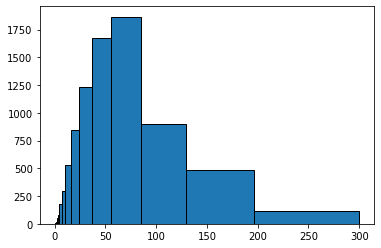

In [80]:
plt.bar(x[:-1], Elog[0].flatten(), width=np.diff(x), ec='black', align='edge')

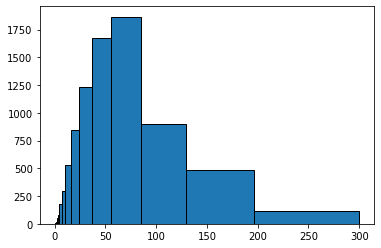

In [61]:
fig, ax = plt.subplots()
ax.bar(x[:-1], y, width=np.diff(x),ec="k", align="edge")
#ax.set_xscale("log")
plt.show()

In [97]:
Elog_norm = Elog/Elog.max()

In [98]:
from sklearn.model_selection import train_test_split
E8X_train, E8X_test, E8Y_train, E8Y_test = train_test_split(Elog_norm , labels_Elog ,test_size=0.2)

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(19, 1)))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 19, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 9, 32)             128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 32)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 9, 64)             6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 4, 64)            

In [103]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [104]:
history = model.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 144262 samples, validate on 36066 samples
Epoch 1/20
144262/144262 [==============================] - 24s 166us/step - loss: 0.7548 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4984
Epoch 2/20
144262/144262 [==============================] - 22s 154us/step - loss: 0.6953 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.4992
Epoch 3/20
144262/144262 [==============================] - 23s 161us/step - loss: 0.6935 - accuracy: 0.5059 - val_loss: 0.6929 - val_accuracy: 0.5196
Epoch 4/20
144262/144262 [==============================] - 22s 150us/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6926 - val_accuracy: 0.5120
Epoch 5/20
144262/144262 [==============================] - 21s 145us/step - loss: 0.6928 - accuracy: 0.5107 - val_loss: 0.6924 - val_accuracy: 0.5110
Epoch 6/20
144262/144262 [==============================] - 25s 173us/step - loss: 0.6927 - accuracy: 0.5128 - val_loss: 0.6922 - val_accuracy: 0.5209
Epoch 7/20
144262/144262 [=================

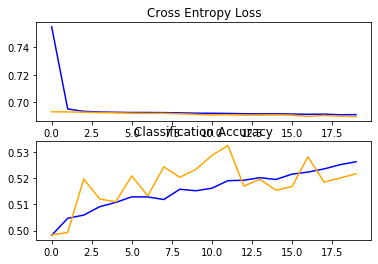

In [105]:
summarize_diagnostics(history)

# remove dropout

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model1 = Sequential()
model1.add(Conv1D(32, 3, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(19, 1)))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Conv1D(64, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Conv1D(128, 3, activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling1D(2))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

In [107]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [108]:
history1 = model1.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 144262 samples, validate on 36066 samples
Epoch 1/20
144262/144262 [==============================] - 23s 161us/step - loss: 0.7041 - accuracy: 0.5279 - val_loss: 0.6851 - val_accuracy: 0.5534
Epoch 2/20
144262/144262 [==============================] - 21s 145us/step - loss: 0.6854 - accuracy: 0.5511 - val_loss: 0.6798 - val_accuracy: 0.5698
Epoch 3/20
144262/144262 [==============================] - 21s 148us/step - loss: 0.6810 - accuracy: 0.5624 - val_loss: 0.6838 - val_accuracy: 0.5549
Epoch 4/20
144262/144262 [==============================] - 22s 151us/step - loss: 0.6785 - accuracy: 0.5695 - val_loss: 0.6757 - val_accuracy: 0.5734
Epoch 5/20
144262/144262 [==============================] - 23s 159us/step - loss: 0.6766 - accuracy: 0.5722 - val_loss: 0.6784 - val_accuracy: 0.5659
Epoch 6/20
144262/144262 [==============================] - 22s 150us/step - loss: 0.6752 - accuracy: 0.5740 - val_loss: 0.6743 - val_accuracy: 0.5763
Epoch 7/20
144262/144262 [=================

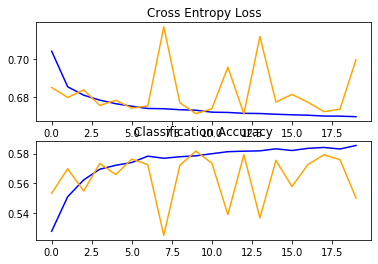

In [109]:
summarize_diagnostics(history1)

# kernel size = 10

In [113]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model2 = Sequential()
model2.add(Conv1D(32, 10, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(19, 1)))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(64, 10, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Conv1D(128, 10, activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling1D(2))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

In [114]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [115]:
history2 = model2.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 144262 samples, validate on 36066 samples
Epoch 1/20
144262/144262 [==============================] - 28s 197us/step - loss: 0.7274 - accuracy: 0.5044 - val_loss: 0.6929 - val_accuracy: 0.5045
Epoch 2/20
144262/144262 [==============================] - 28s 195us/step - loss: 0.6944 - accuracy: 0.5109 - val_loss: 0.6924 - val_accuracy: 0.5055
Epoch 3/20
144262/144262 [==============================] - 28s 195us/step - loss: 0.6927 - accuracy: 0.5136 - val_loss: 0.6924 - val_accuracy: 0.5040
Epoch 4/20
144262/144262 [==============================] - 27s 191us/step - loss: 0.6914 - accuracy: 0.5224 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 5/20
144262/144262 [==============================] - 25s 173us/step - loss: 0.6902 - accuracy: 0.5326 - val_loss: 0.6911 - val_accuracy: 0.5122
Epoch 6/20
144262/144262 [==============================] - 28s 193us/step - loss: 0.6884 - accuracy: 0.5394 - val_loss: 0.6903 - val_accuracy: 0.5144
Epoch 7/20
144262/144262 [=================

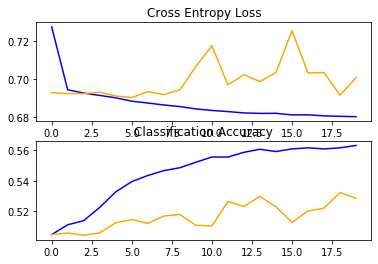

In [116]:
summarize_diagnostics(history2)

# kernel size = 15

In [117]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model3 = Sequential()
model3.add(Conv1D(32, 15, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(19, 1)))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Conv1D(64, 15, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Conv1D(128, 15, activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(MaxPooling1D(2))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

In [118]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [119]:
history3 = model3.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 144262 samples, validate on 36066 samples
Epoch 1/20
144262/144262 [==============================] - 30s 205us/step - loss: 0.7197 - accuracy: 0.5089 - val_loss: 0.6923 - val_accuracy: 0.5079
Epoch 2/20
144262/144262 [==============================] - 28s 196us/step - loss: 0.6934 - accuracy: 0.5147 - val_loss: 0.6913 - val_accuracy: 0.5241
Epoch 3/20
144262/144262 [==============================] - 28s 197us/step - loss: 0.6918 - accuracy: 0.5198 - val_loss: 0.6903 - val_accuracy: 0.5267
Epoch 4/20
144262/144262 [==============================] - 29s 199us/step - loss: 0.6910 - accuracy: 0.5262 - val_loss: 0.6896 - val_accuracy: 0.5283
Epoch 5/20
144262/144262 [==============================] - 29s 200us/step - loss: 0.6903 - accuracy: 0.5294 - val_loss: 0.6889 - val_accuracy: 0.5354
Epoch 6/20
144262/144262 [==============================] - 26s 181us/step - loss: 0.6893 - accuracy: 0.5352 - val_loss: 0.6892 - val_accuracy: 0.5269
Epoch 7/20
144262/144262 [=================

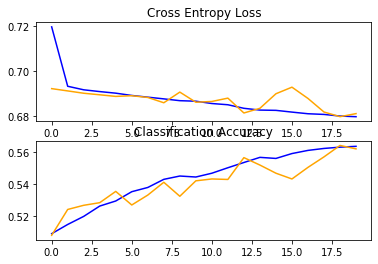

In [120]:
summarize_diagnostics(history3)

# kernel size = 19

In [153]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization

model4 = Sequential()
model4.add(Conv1D(32, 19, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(19, 1)))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Conv1D(64, 9, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Conv1D(128, 4, activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling1D(2))
model4.add(BatchNormalization())
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.2))
model4.add(Dense(1, activation='sigmoid'))

In [154]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [155]:
history4 = model4.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 144262 samples, validate on 36066 samples
Epoch 1/20
144262/144262 [==============================] - 20s 139us/step - loss: 0.7226 - accuracy: 0.5242 - val_loss: 0.6837 - val_accuracy: 0.5543
Epoch 2/20
144262/144262 [==============================] - 20s 135us/step - loss: 0.6961 - accuracy: 0.5420 - val_loss: 0.6813 - val_accuracy: 0.5624
Epoch 3/20
144262/144262 [==============================] - 19s 130us/step - loss: 0.6890 - accuracy: 0.5479 - val_loss: 0.6809 - val_accuracy: 0.5632
Epoch 4/20
144262/144262 [==============================] - 19s 133us/step - loss: 0.6848 - accuracy: 0.5549 - val_loss: 0.6785 - val_accuracy: 0.5663
Epoch 5/20
144262/144262 [==============================] - 19s 131us/step - loss: 0.6822 - accuracy: 0.5586 - val_loss: 0.6772 - val_accuracy: 0.5700
Epoch 6/20
144262/144262 [==============================] - 19s 130us/step - loss: 0.6803 - accuracy: 0.5634 - val_loss: 0.6772 - val_accuracy: 0.5677
Epoch 7/20
144262/144262 [=================

In [ ]:
# 57.51

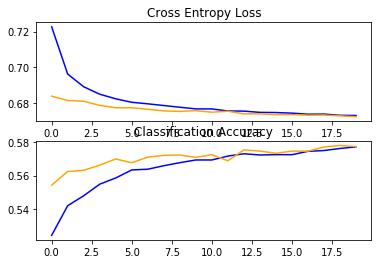

In [156]:
summarize_diagnostics(history4)

In [125]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 19, 32)            640       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 9, 32)             0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 9, 32)             128       
_________________________________________________________________
dropout_22 (Dropout)         (None, 9, 32)             0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 9, 64)             38976     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 4, 64)             0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 4, 64)            

In [126]:
model2 = Sequential()
#model1.add(Input(shape=(21,1)))
model2.add(Flatten(input_shape=(19,1)))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))

In [127]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [128]:
history2 = model2.fit(E8X_train, E8Y_train, batch_size=64, validation_data=(E8X_test, E8Y_test), epochs=20)

Train on 144262 samples, validate on 36066 samples
Epoch 1/20
144262/144262 [==============================] - 6s 39us/step - loss: 0.7193 - accuracy: 0.5085 - val_loss: 0.6932 - val_accuracy: 0.5206
Epoch 2/20
144262/144262 [==============================] - 6s 40us/step - loss: 0.6917 - accuracy: 0.5248 - val_loss: 0.6902 - val_accuracy: 0.5278
Epoch 3/20
144262/144262 [==============================] - 6s 40us/step - loss: 0.6893 - accuracy: 0.5328 - val_loss: 0.6885 - val_accuracy: 0.5355
Epoch 4/20
144262/144262 [==============================] - 6s 41us/step - loss: 0.6876 - accuracy: 0.5404 - val_loss: 0.6871 - val_accuracy: 0.5419
Epoch 5/20
144262/144262 [==============================] - 6s 43us/step - loss: 0.6862 - accuracy: 0.5491 - val_loss: 0.6856 - val_accuracy: 0.5464
Epoch 6/20
144262/144262 [==============================] - 6s 44us/step - loss: 0.6847 - accuracy: 0.5533 - val_loss: 0.6842 - val_accuracy: 0.5534
Epoch 7/20
144262/144262 [=============================

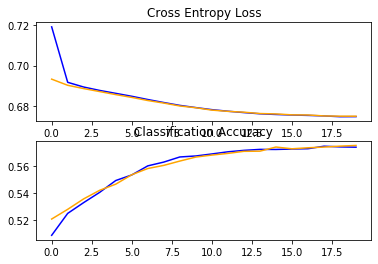

In [129]:
summarize_diagnostics(history2)

NameError: name 'z' is not defined

In [145]:
E8 = np.empty((200057, 100, 1), dtype=cp.float64)
labels_E8 = np.zeros(200057)
folder = 'prova_E/E8_100/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E8[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (100,1))
    E8[i] = array
    i += 1

In [147]:
E9 = np.empty((200057, 99, 1), dtype=cp.float64)
labels_E9 = np.zeros(200057)
folder = 'prova_E/E8_100log/'
i = 0
for file in os.listdir(folder):
    if file.startswith('el'):
        labels_E9[i] = 1
    array = np.load(folder + file)
    array = cp.reshape(array, (99,1))
    E9[i] = array
    i += 1

<BarContainer object of 100 artists>

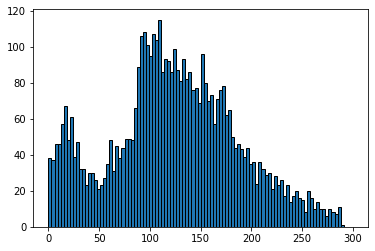

In [151]:
x = np.linspace(0, 300, 101)
plt.bar(x[:-1], E8[2].flatten(), width=np.diff(x), ec='black', align='edge')

<BarContainer object of 99 artists>

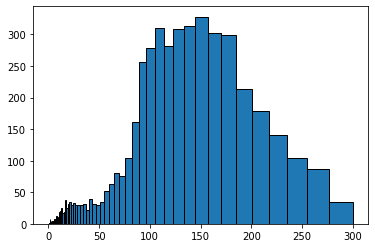

In [152]:
x = np.logspace(np.log10(0.1), np.log10(300), 100)
plt.bar(x[:-1], E9[2].flatten(), width=np.diff(x), ec='black', align='edge')